In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/Mall_Customers.csv")
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
df.isnull()

CustomerID  Genre    Age  Annual Income (k$)  Spending Score (1-100)
0         False  False  False               False                   False
1         False  False  False               False                   False
2         False  False  False               False                   False
3         False  False  False               False                   False
4         False  False  False               False                   False
..          ...    ...    ...                 ...                     ...
195       False  False  False               False                   False
196       False  False  False               False                   False
197       False  False  False               False                   False
198       False  False  False               False                   False
199       False  False  False               False                   False

[200 rows x 5 columns]

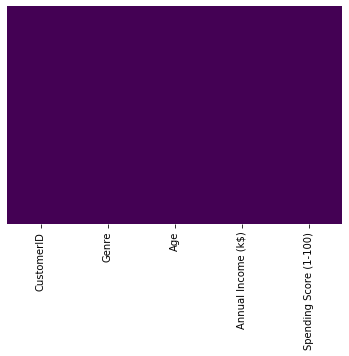

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

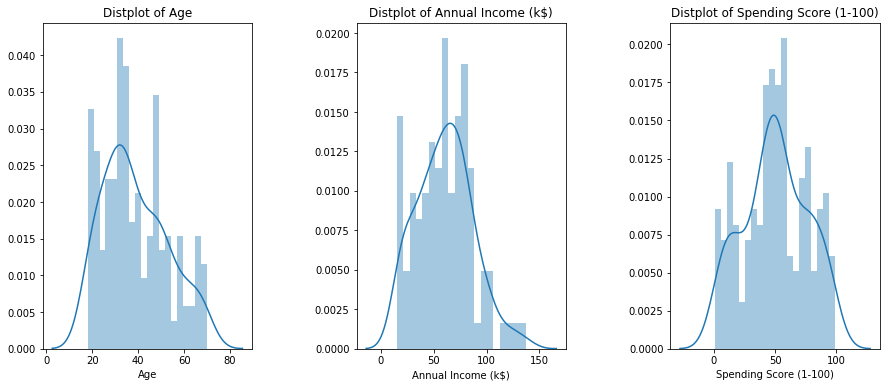

In [6]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

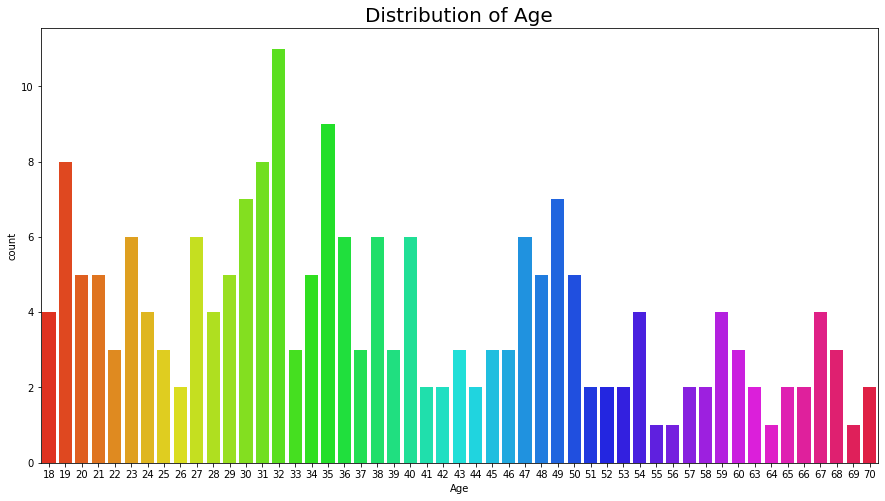

In [7]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

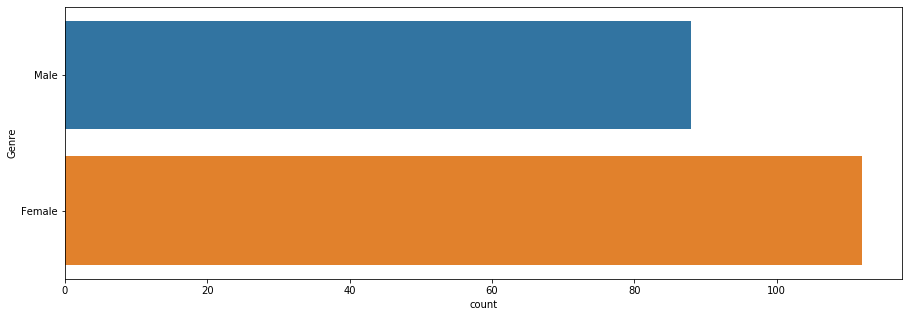

In [8]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = "Genre", data = df)
plt.show()

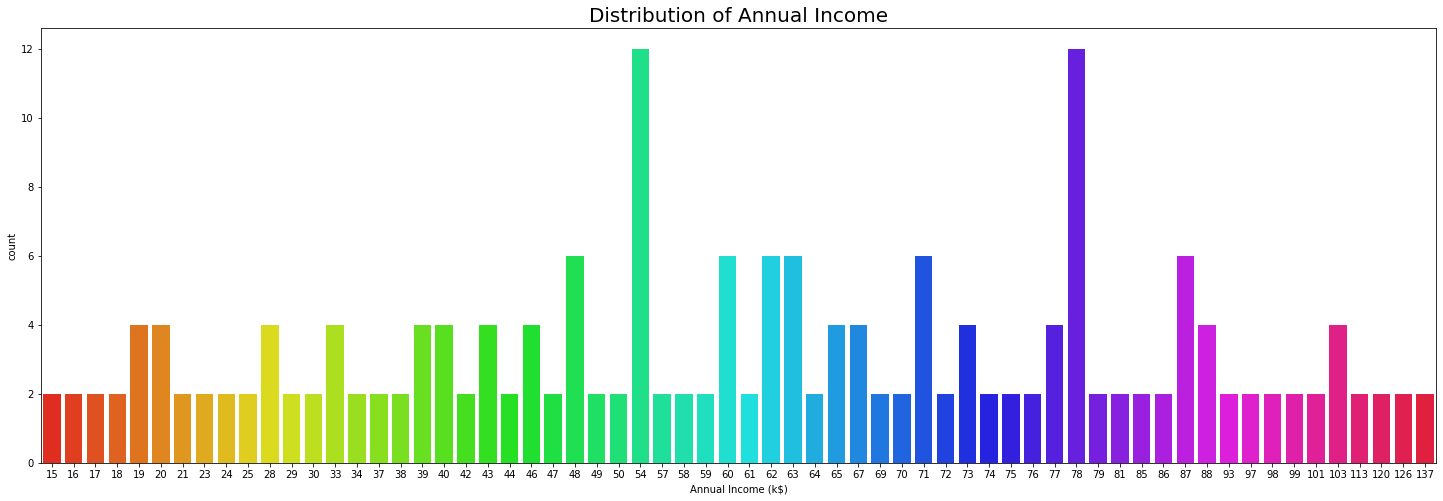

In [9]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'hsv')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

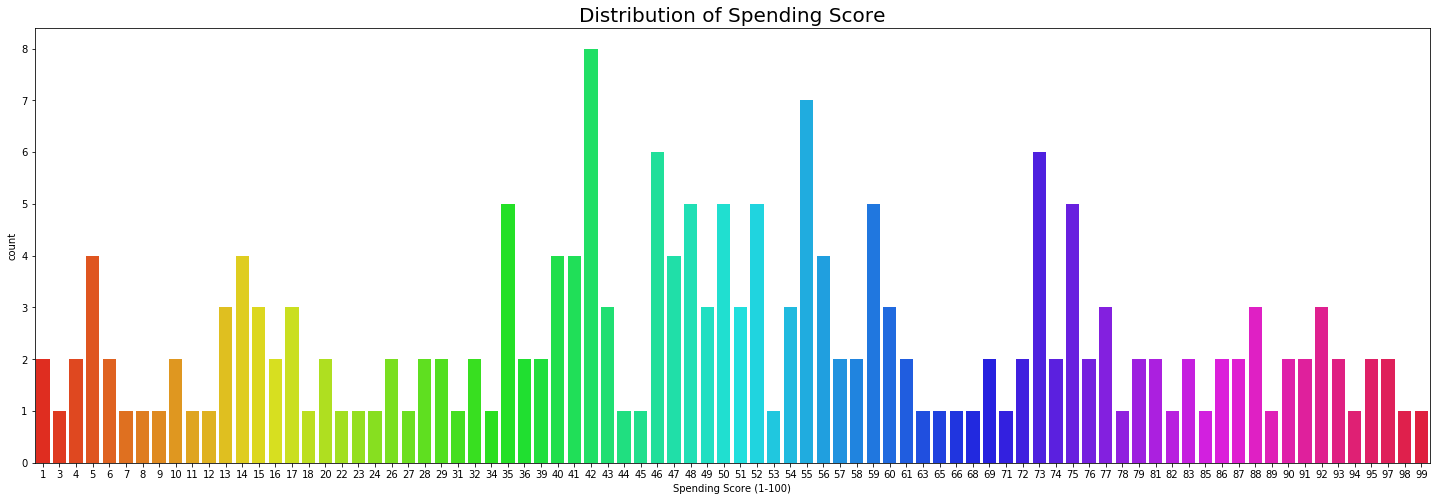

In [10]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df['Spending Score (1-100)'], palette = 'hsv')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

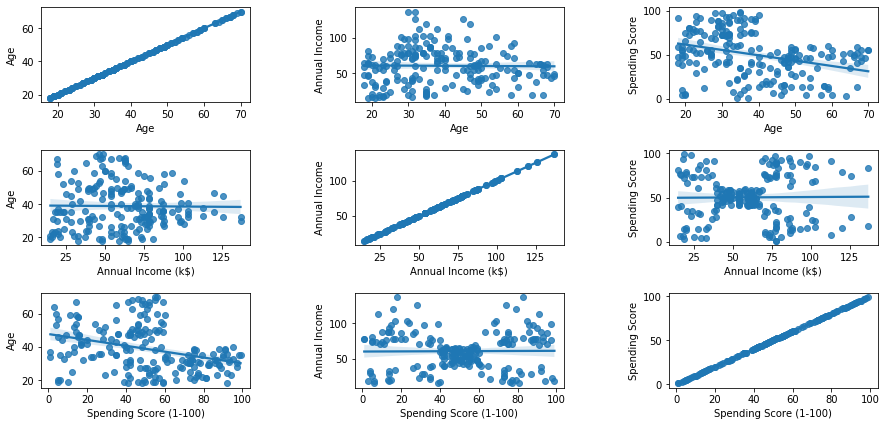

In [11]:
plt.figure(1, figsize = (15,7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len (y.split()) > 1 else y)
plt.show()

# ANNUAL INCOME Vs GENDER AGE

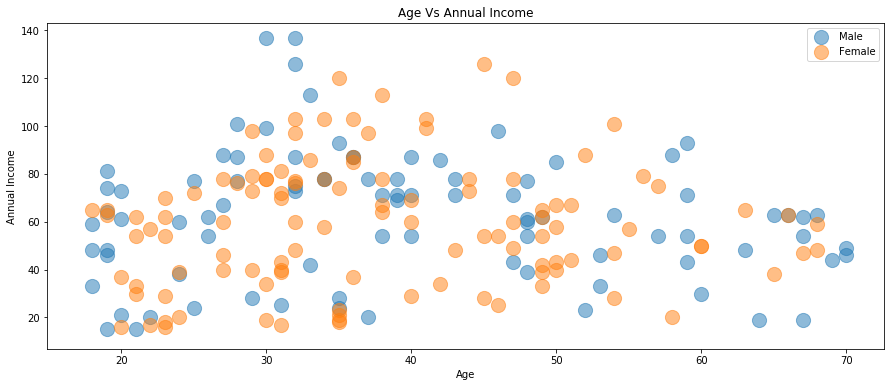

In [12]:
plt.figure(1, figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = "Age", y = "Annual Income (k$)", data = df[df['Genre'] == gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age Vs Annual Income")
plt.legend()
plt.show()

# ANNUAL INCOME Vs SPENDING SCORE

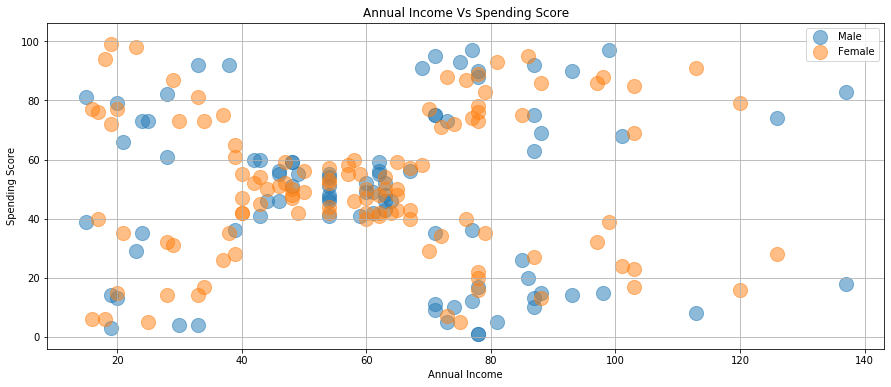

In [13]:
plt.figure(1, figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df[df['Genre'] == gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income Vs Spending Score")
plt.grid()
plt.legend()
plt.show()

# DISTRIBUTION OF VALUES IN AGE, ANNUAL INCOME & SPENDING SCORE

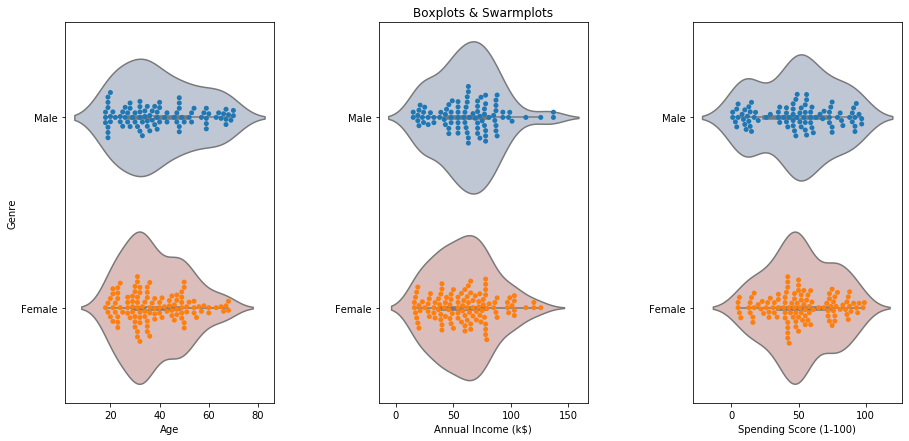

In [14]:
plt.figure(figsize = (15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Genre', data = df, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Genre', data = df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# MODEL 1

# CLUSTERING (K - MEANS)

#### AGE Vs SPENDING SCORE

In [15]:
from sklearn.cluster import KMeans

In [16]:
x1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

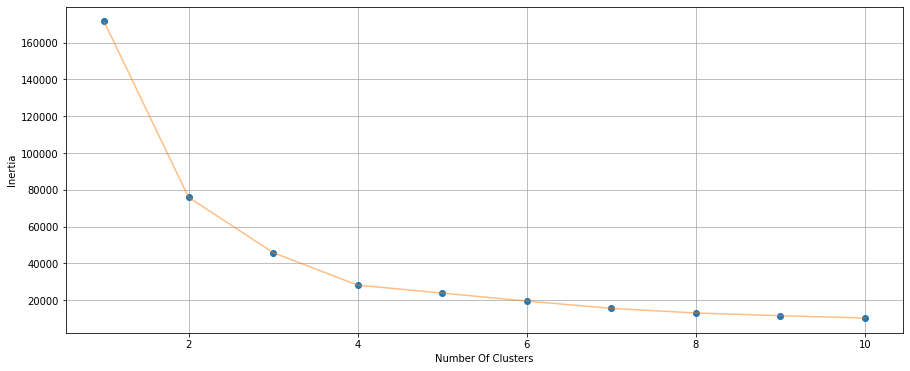

In [17]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [18]:
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [19]:
h = 0.02
x_min, x_max = x1[:,0].min(-1), x1[:,0].max()+1
y_min, y_max = x1[:,0].min(-1), x1[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

#### ANNUAL INCOME Vs SPENDING SCORE

In [20]:
x2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
    algorithm.fit(x2)
    inertia.append(algorithm.inertia_)

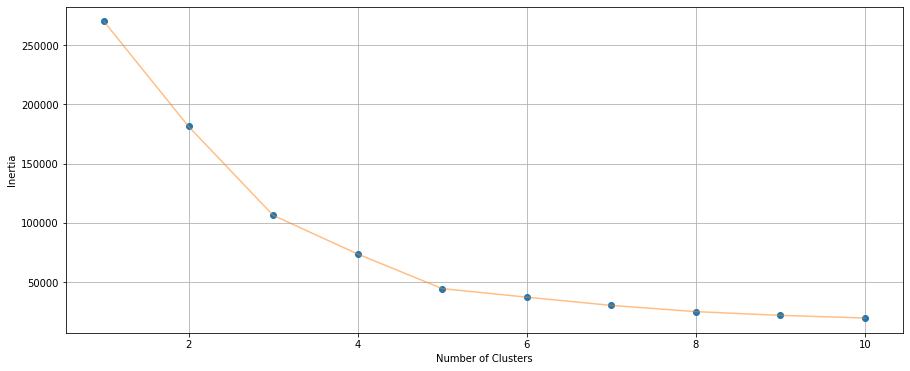

In [21]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
algorithm.fit(x2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = x2[:,0].min(-1), x2[:,0].max()+1
y_min, y_max = x2[:,0].min(-1), x2[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

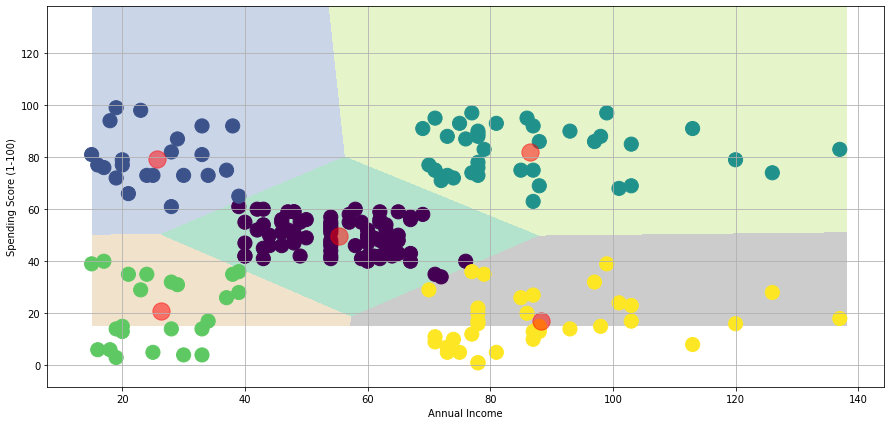

In [24]:
plt.figure(figsize = (15,7))
plt.clf()
z2= z2.reshape(xx.shape)
plt.imshow(z2, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 200)
plt.scatter(x = centroids2[:,0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

#### AGE Vs ANNUAL INCOME Vs SPENDINGSCORE

In [25]:
import plotly as py
import plotly.graph_objs as go

In [26]:
x3 = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
    algorithm.fit(x3)
    inertia.append(algorithm.inertia_)

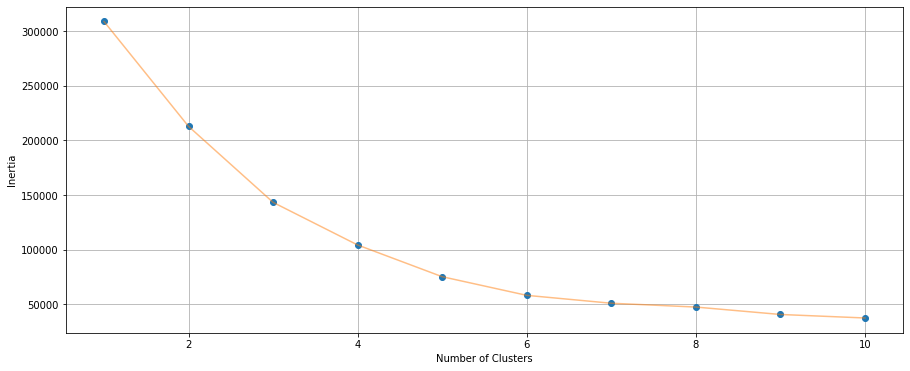

In [27]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [28]:
algorithm = (KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0, algorithm = 'elkan'))
algorithm.fit(x3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [29]:
df['label3'] = labels3
trace1 = go.Scatter3d(
            x = df['Age'],
            y = df['Spending Score (1-100)'],
            z = df['Annual Income (k$)'],
            mode = 'markers',
            marker = dict(
                        color = df['label3'],
                        size = 20,
                        line = dict(
                            color = df['label3'],
                            width = 12),
                        opacity = 0.8)
)
data = [trace1]
layout = go.Layout(
        title = 'clusters',
        scene = dict(
            xaxis = dict(title = "Age"),
            yaxis = dict(title = "Spending Score"),
            zaxis = dict(title = "Annual Income")
        )
)
fig = go.Figure(data = data, layout = layout)

py.offline.iplot(fig)

# MODEL 2

# KMEANS CLUSTERING

In [30]:
from sklearn.cluster import KMeans

In [31]:
df['Genre'] = pd.get_dummies(df['Genre'])

In [32]:
df.dtypes

CustomerID                int64
Genre                     uint8
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
label3                    int32
dtype: object

In [33]:
customers = df.loc[:,["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [34]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(customers)
    wcss.append(kmeans.inertia_)

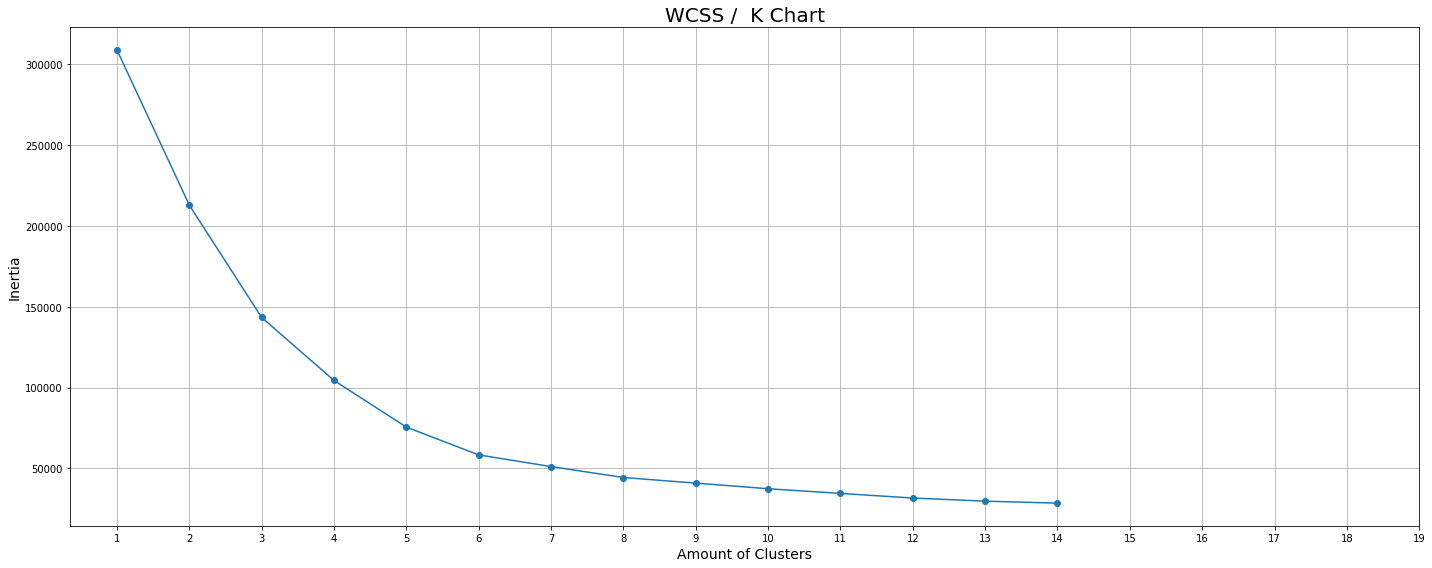

In [35]:
plt.figure(figsize = (20,8))
plt.title("WCSS /  K Chart", fontsize = 20)
plt.plot(range(1,15), wcss, "-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

### VISUALIZING CLUSTERS

In [36]:
x = df.iloc[:,[3,4]].values

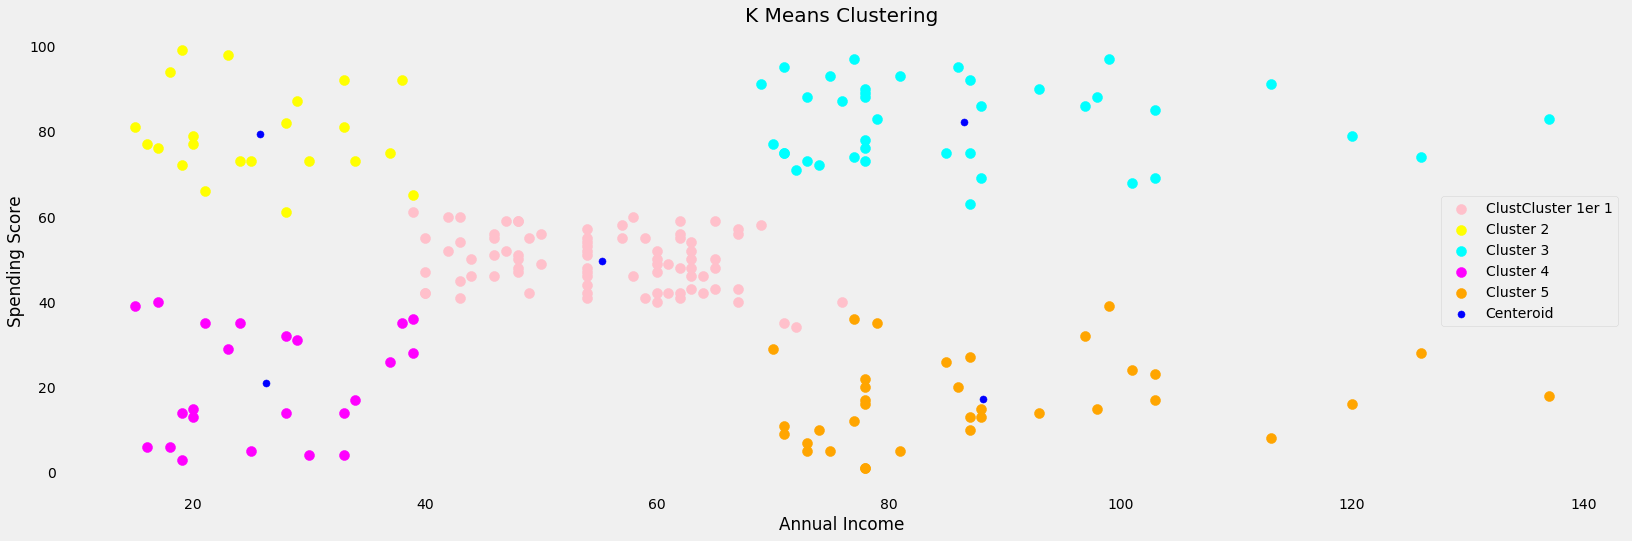

In [45]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'ClustCluster 1er 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# HIERARCHIAL CLUSTERING

In [39]:
import scipy.cluster.hierarchy as sch

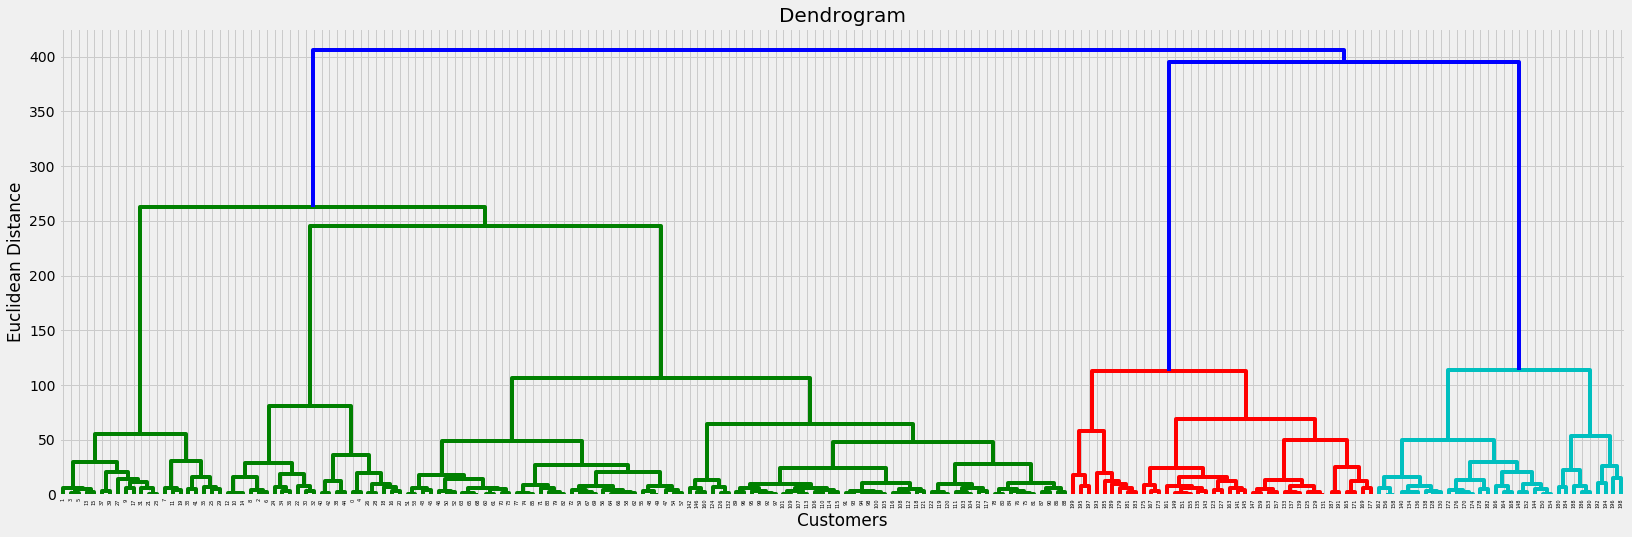

In [40]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram", fontsize = 20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

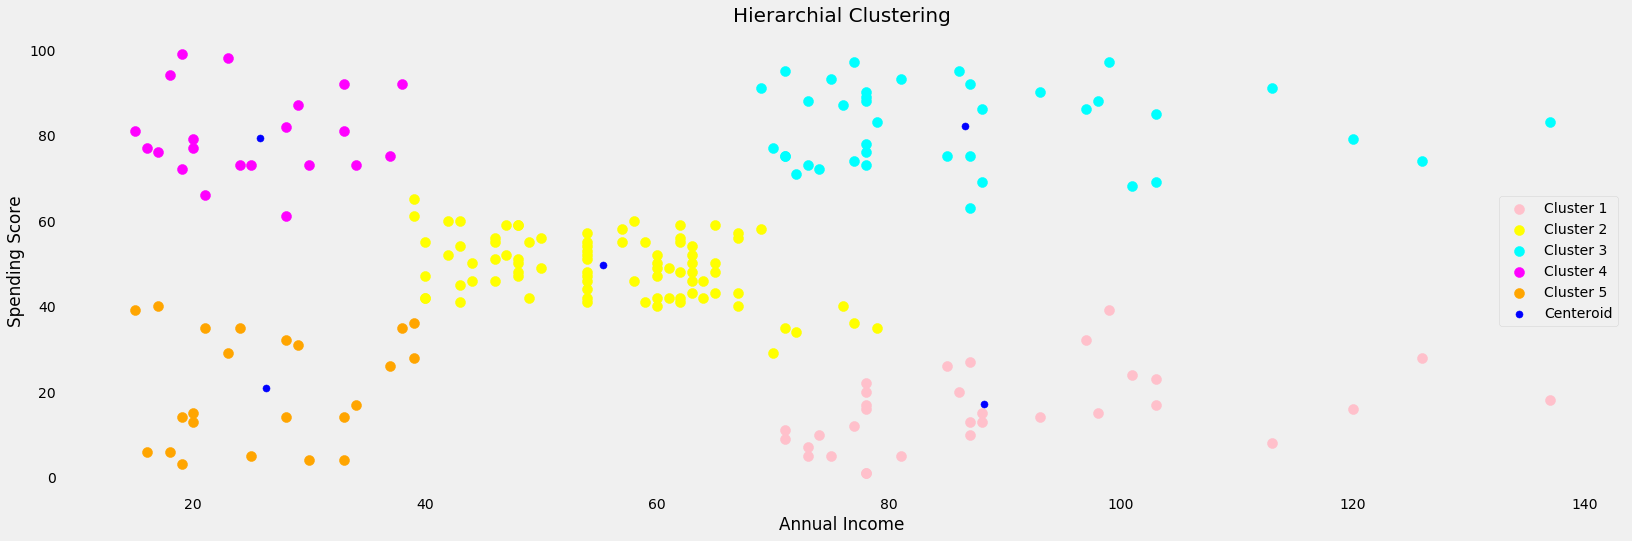

In [44]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.title("Hierarchial Clustering", fontsize = 20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid()
plt.show()